**1. Importing the dependencies**

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
from scipy.stats import randint, uniform
import pickle
from google.colab import files

**2. Data Loading and Understanding**

In [222]:
print("Please upload customer_churn.csv")
uploaded = files.upload()
if not uploaded:
    raise ValueError("No file uploaded. Please upload customer_churn.csv")
df = pd.read_csv(list(uploaded.keys())[0])

Please upload customer_churn.csv


Saving customer_churn.csv to customer_churn (5).csv


In [223]:
# Verify dataset integrity
if df.empty:
    raise ValueError("Loaded dataset is empty. Check the uploaded file.")
print("Dataset Shape:", df.shape)  # Should be (7043, 21)
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (7043, 21)

First 5 rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract

In [224]:
df.shape

(7043, 21)

In [147]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [225]:
# For the customer churn dataset (customer_churn.csv, 7043 rows, 21 columns), the DataFrame includes columns like customerID, gender, SeniorCitizen, tenure, MonthlyCharges, TotalCharges, Churn, etc. Without this setting, displaying df might truncate columns. With pd.set_option("display.max_columns", None), all 21 columns are shown in full.
pd.set_option("display.max_columns", None)

In [226]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())
print("\nClass Distribution:\n", df['Churn'].value_counts())

Dataset Shape: (7043, 21)

First 5 rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract

In [229]:
# Check for NaNs in Churn
print("\nNaNs in Churn:", df['Churn'].isnull().sum())


NaNs in Churn: 0


In [230]:
df.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


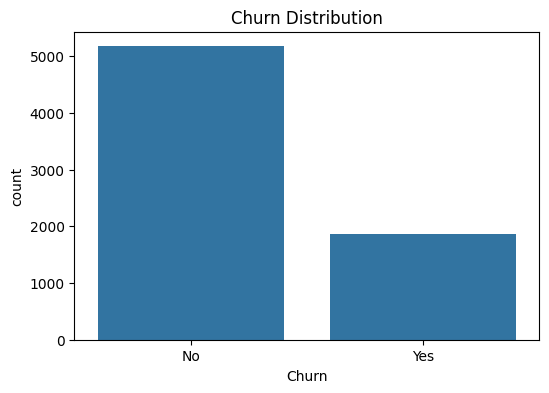

In [232]:
# Visualizing Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

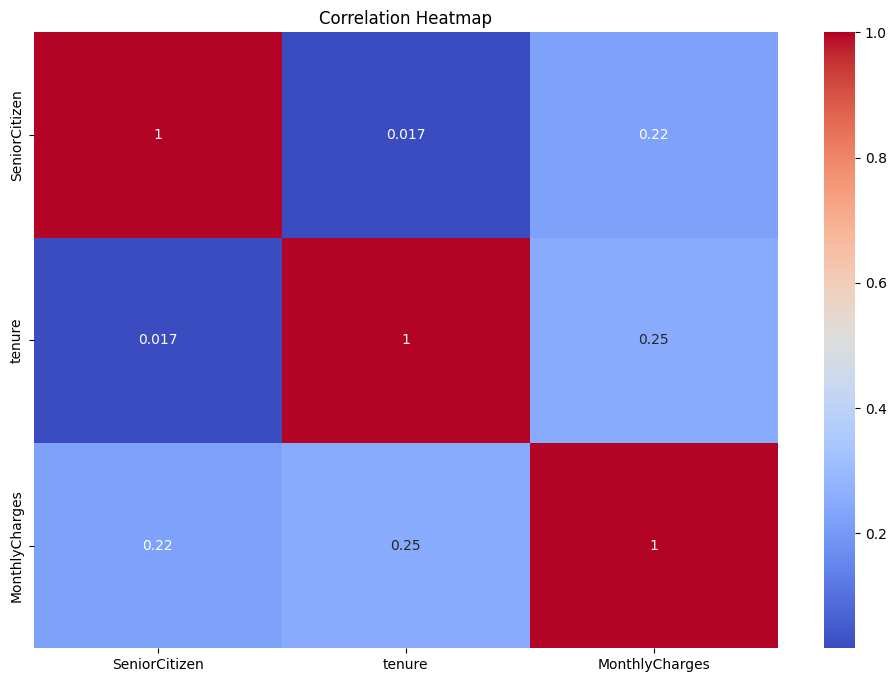

In [152]:
# Correlation Heatmap for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [233]:
# Preprocessing
# Handle missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())  # Use median, avoid inplace

In [234]:
# dropping customerID column as this is not required for modelling
df = df.drop('customerID', axis=1)

In [235]:
df.head(2)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No

In [236]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [237]:
# Unique is a read-only operation for analysis
print(df["gender"].unique())

['Female' 'Male']


In [238]:
print(df["SeniorCitizen"].unique())

[0 1]


In [239]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [240]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [241]:
df[df["TotalCharges"]==" "]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [242]:
len(df[df["TotalCharges"]==" "])

0

In [243]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [244]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [246]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**3. Exploratory Data Analysis (EDA)**

In [247]:
df.shape

(7043, 20)

In [248]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [249]:
df.head(2)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No

In [250]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [251]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

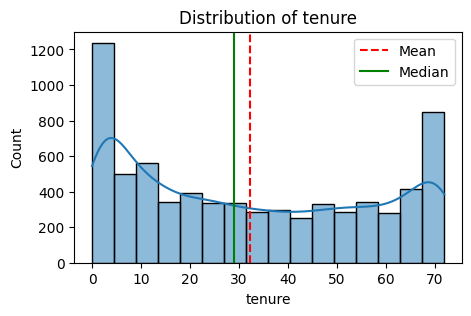

In [252]:
plot_histogram(df, "tenure")

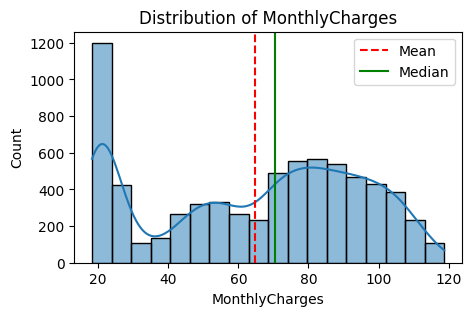

In [253]:
plot_histogram(df, "MonthlyCharges")

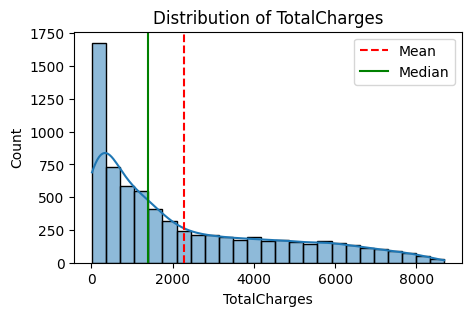

In [254]:
plot_histogram(df, "TotalCharges")

**Box plot for numerical features**

In [256]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

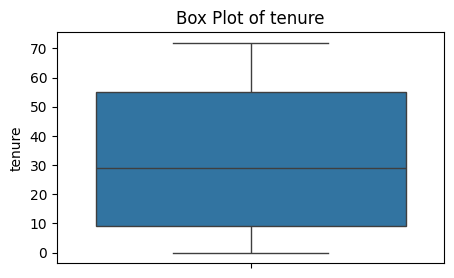

In [257]:
plot_boxplot(df, "tenure")

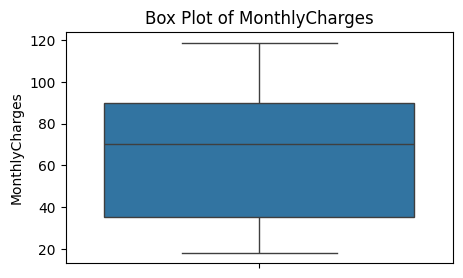

In [258]:
plot_boxplot(df, "MonthlyCharges")

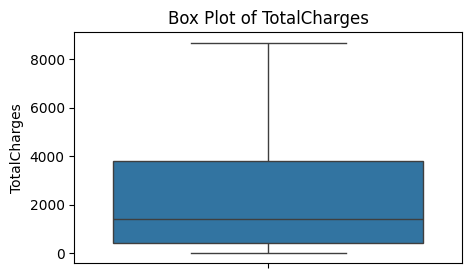

In [259]:
plot_boxplot(df, "TotalCharges")

**Correlation Heatmap for numerical columns**

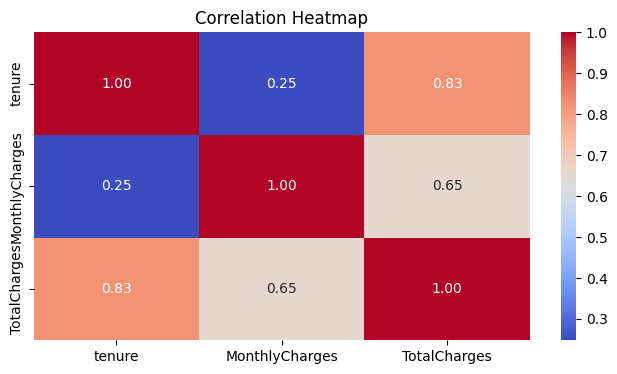

In [260]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [261]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Countplot for categorical columns

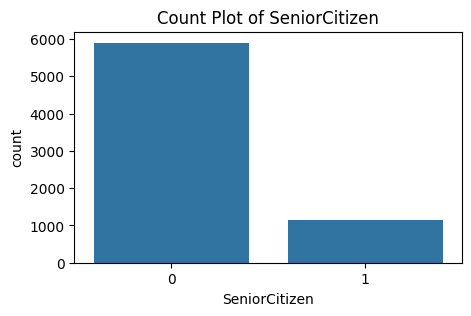

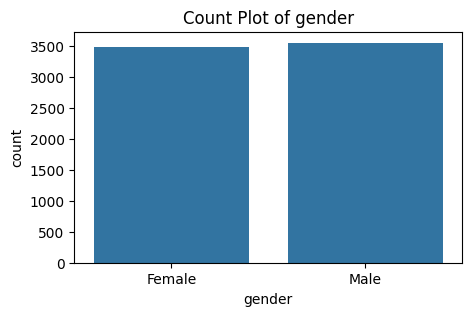

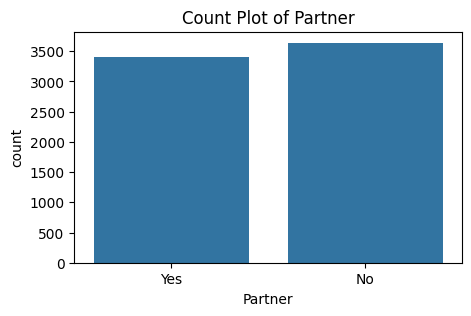

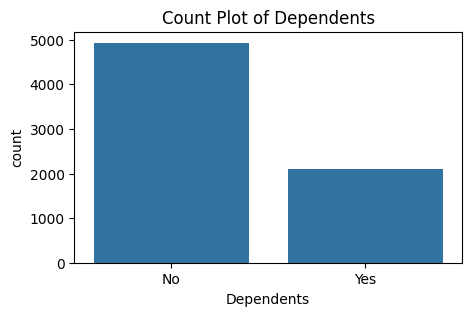

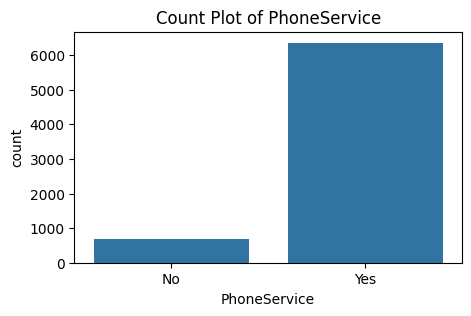

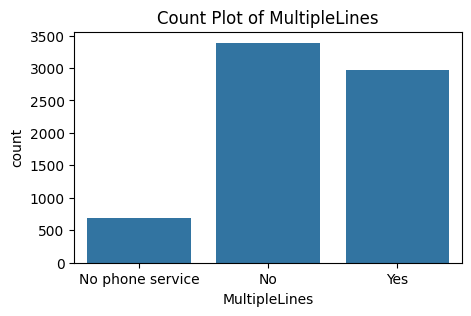

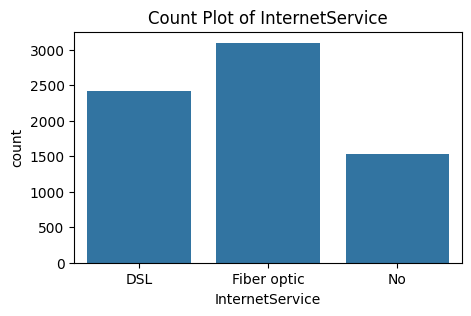

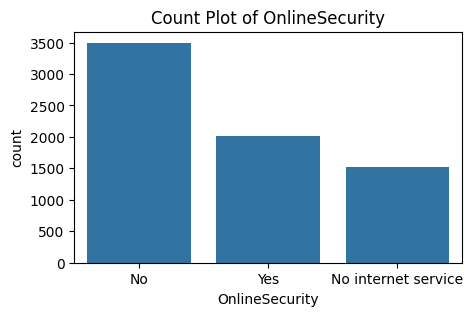

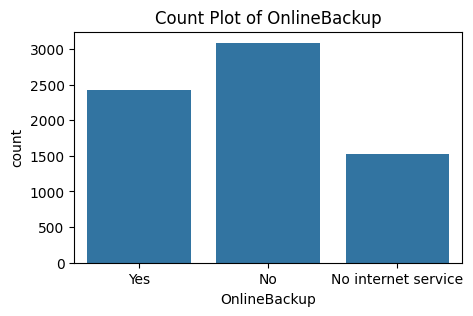

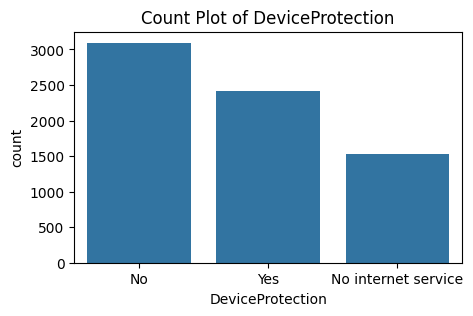

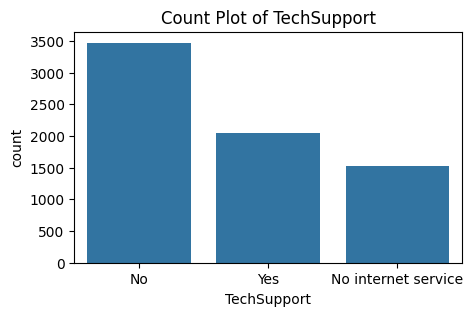

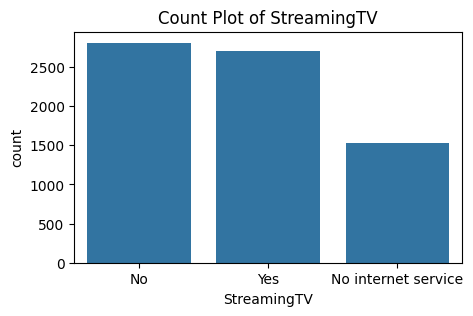

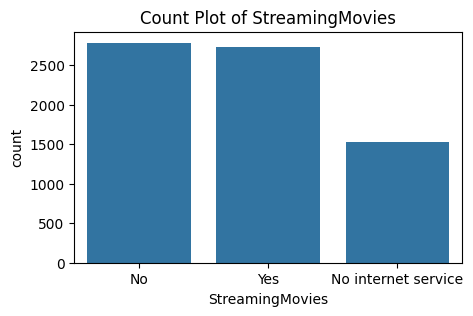

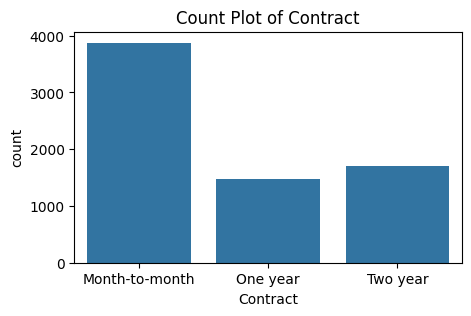

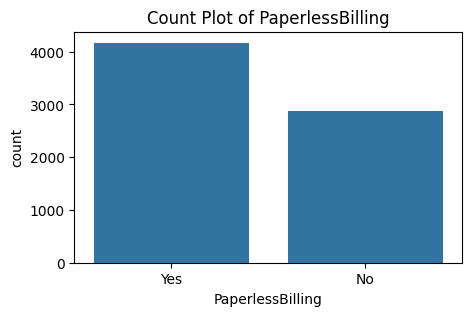

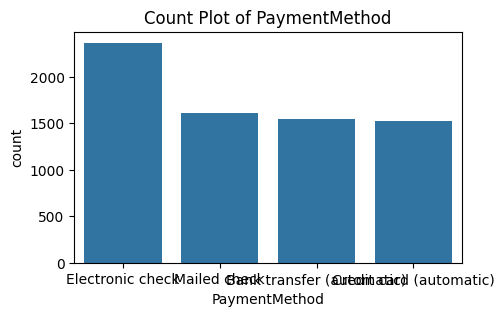

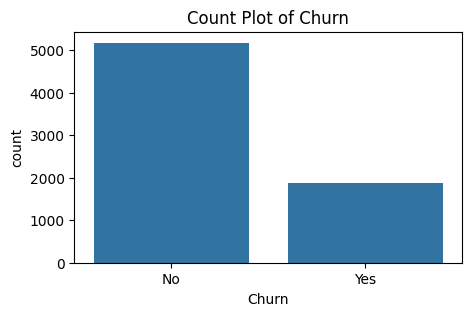

In [263]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

**4. Data Preprocessing**

In [264]:
df.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No  
2              Yes      Mailed check           53.85        108.15   Yes

In [265]:
# Handle any nulls in Churn (if any, fill with 'No')
df['Churn'] = df['Churn'].fillna('No')

In [266]:
# Encode categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling', 'PaymentMethod']
encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_columns}
for col in categorical_columns:
    df[col] = encoders[col].transform(df[col])

Label encoding of target column

In [267]:
# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [268]:
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1

In [269]:
# Verify no NaNs in Churn before SMOTE
if df['Churn'].isnull().any():
    raise ValueError("NaNs found in Churn after encoding. Check data integrity.")
print("NaNs in Churn after encoding:", df['Churn'].isnull().sum())

NaNs in Churn after encoding: 0


In [271]:
# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

Label encoding of categorical fetaures

In [272]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [273]:
print(object_columns)

Index([], dtype='object')


In [274]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [218]:
encoders

{}

In [275]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [277]:
# Verify no NaNs in Churn before SMOTE
if df['Churn'].isnull().any():
    raise ValueError("NaNs found in Churn after encoding. Check data integrity.")
print("NaNs in Churn after encoding:", df['Churn'].isnull().sum())

NaNs in Churn after encoding: 0


In [278]:
# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [279]:
# Verify non-empty data before SMOTE
if X.empty or y.empty:
    raise ValueError("X or y is empty before SMOTE. Check preprocessing steps.")
print("Original class distribution:", pd.Series(y).value_counts())  # 0: 5174, 1: 1869

Original class distribution: Churn
0    5174
1    1869
Name: count, dtype: int64


**Traianing and test data split**

In [280]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("SMOTE class distribution:", pd.Series(y_resampled).value_counts())  # 0: 5174, 1: 5174

SMOTE class distribution: Churn
0    5174
1    5174
Name: count, dtype: int64


In [281]:
# Train-test split for SMOTE data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [282]:
print(y_train.shape)

(8278,)


In [283]:
print(y_train.value_counts())

Churn
1    4139
0    4139
Name: count, dtype: int64


In [284]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training data shape:", X_train_scaled.shape)  # ~8278 rows, 19 columns

Training data shape: (8278, 19)


In [285]:
# Try downsampling as alternative to SMOTE
rus = RandomUnderSampler(random_state=42)
X_resampled_down, y_resampled_down = rus.fit_resample(X, y)
print("Downsampled class distribution:", pd.Series(y_resampled_down).value_counts())  # 0: 1869, 1: 1869

Downsampled class distribution: Churn
0    1869
1    1869
Name: count, dtype: int64


In [286]:
# Train-test split for downsampled data
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(
    X_resampled_down, y_resampled_down, test_size=0.2, random_state=42, stratify=y_resampled_down
)

In [287]:
# Scale downsampled data
scaler_down = StandardScaler()
X_train_scaled_down = scaler_down.fit_transform(X_train_down)
X_test_scaled_down = scaler_down.transform(X_test_down)
print("Downsampled training data shape:", X_train_scaled_down.shape)  # ~2990 rows, 19 columns

Downsampled training data shape: (2990, 19)


In [290]:
# Define Models
models = {
    'Decision Tree': Pipeline([('classifier', DecisionTreeClassifier(random_state=42))]),
    'Random Forest': Pipeline([('classifier', RandomForestClassifier(random_state=42))]),
    'XGBoost': Pipeline([('classifier', XGBClassifier(eval_metric='logloss', random_state=42))]),
    'Logistic Regression': Pipeline([('classifier', LogisticRegression(class_weight='balanced', random_state=42))]),
    'SVM': Pipeline([('classifier', SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42))]),
    'Gradient Boosting': Pipeline([('classifier', GradientBoostingClassifier(random_state=42))])
}

In [291]:
# Hyperparameter Tuning (on SMOTE data)
# Tune RandomForest
param_dist_rf = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 4)
}
rf_random = RandomizedSearchCV(
    models['Random Forest'], param_dist_rf, n_iter=50, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1
)
rf_random.fit(X_train_scaled, y_train)
print("Best RandomForest params:", rf_random.best_params_)
print("Best RandomForest CV F1:", rf_random.best_score_)

Best RandomForest params: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 271}
Best RandomForest CV F1: 0.8449946066585458


In [292]:
# Tune XGBoost
param_dist_xgb = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__subsample': uniform(0.8, 0.2)
}
xgb_random = RandomizedSearchCV(
    models['XGBoost'], param_dist_xgb, n_iter=50, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1
)
xgb_random.fit(X_train_scaled, y_train)
print("Best XGBoost params:", xgb_random.best_params_)
print("Best XGBoost CV F1:", xgb_random.best_score_)

Best XGBoost params: {'classifier__learning_rate': np.float64(0.05346846162736693), 'classifier__max_depth': 6, 'classifier__n_estimators': 259, 'classifier__subsample': np.float64(0.9105786178142656)}
Best XGBoost CV F1: 0.846441250781286


In [293]:
# Tune DecisionTree
param_grid_dt = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [5, 10, 20],
    'classifier__min_samples_leaf': [2, 4, 8]
}
dt_grid = GridSearchCV(
    models['Decision Tree'], param_grid_dt, cv=3, scoring='f1_weighted', n_jobs=-1
)
dt_grid.fit(X_train_scaled, y_train)
print("Best DecisionTree params:", dt_grid.best_params_)
print("Best DecisionTree CV F1:", dt_grid.best_score_)

Best DecisionTree params: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Best DecisionTree CV F1: 0.8100174690093471


In [294]:
# Update models with tuned versions
models['Tuned Decision Tree'] = dt_grid.best_estimator_
models['Tuned Random Forest'] = rf_random.best_estimator_
models['Tuned XGBoost'] = xgb_random.best_estimator_

In [295]:
# Address Overfitting with Regularization (on tuned models)
# Tuned DecisionTree
dt_tuned = models['Tuned Decision Tree'].named_steps['classifier']
dt_tuned.fit(X_train_scaled, y_train)
train_acc_dt = accuracy_score(y_train, dt_tuned.predict(X_train_scaled))
test_acc_dt = accuracy_score(y_test, dt_tuned.predict(X_test_scaled))
print(f"Tuned DT Overfitting Gap: Train {train_acc_dt:.4f} vs Test {test_acc_dt:.4f}")

Tuned DT Overfitting Gap: Train 0.8776 vs Test 0.8159


In [296]:
# Tuned RandomForest
rf_tuned = models['Tuned Random Forest'].named_steps['classifier']
rf_tuned.fit(X_train_scaled, y_train)
train_acc_rf = accuracy_score(y_train, rf_tuned.predict(X_train_scaled))
test_acc_rf = accuracy_score(y_test, rf_tuned.predict(X_test_scaled))
print(f"Tuned RF Overfitting Gap: Train {train_acc_rf:.4f} vs Test {test_acc_rf:.4f}")

Tuned RF Overfitting Gap: Train 0.9824 vs Test 0.8512


In [305]:
# Tuned XGBoost with early stopping (compatible with older xgboost versions)
xgb_tuned = models['Tuned XGBoost'].named_steps['classifier']

xgb_tuned.fit(
    X_train_scaled, y_train,
    verbose=False
)

train_acc_xgb = accuracy_score(y_train, xgb_tuned.predict(X_train_scaled))
test_acc_xgb = accuracy_score(y_test, xgb_tuned.predict(X_test_scaled))
print(f"Tuned XGBoost Overfitting Gap: Train {train_acc_xgb:.4f} vs Test {test_acc_xgb:.4f}")

print("\nOverfitting Summary: Aim for train-test gap <0.05")

Tuned XGBoost Overfitting Gap: Train 0.9182 vs Test 0.8386

Overfitting Summary: Aim for train-test gap <0.05


In [306]:
# 9. Model Selection with Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1_weighted', 'roc_auc', 'precision_weighted', 'recall_weighted']

cv_results = {}
for name, model in models.items():
    cv_scores = cross_validate(model, X_train_scaled, y_train, cv=skf, scoring=scoring, n_jobs=-1)
    cv_results[name] = {
        'Accuracy Mean': cv_scores['test_accuracy'].mean(),
        'F1 Mean': cv_scores['test_f1_weighted'].mean(),
        'AUC Mean': cv_scores['test_roc_auc'].mean(),
        'Precision Mean': cv_scores['test_precision_weighted'].mean(),
        'Recall Mean': cv_scores['test_recall_weighted'].mean(),
        'Std (F1)': cv_scores['test_f1_weighted'].std()
    }
    print(f"{name} - F1: {cv_results[name]['F1 Mean']:.4f} ± {cv_results[name]['Std (F1)']:.4f}")

Decision Tree - F1: 0.7955 ± 0.0049
Random Forest - F1: 0.8461 ± 0.0090
XGBoost - F1: 0.8425 ± 0.0049
Logistic Regression - F1: 0.8041 ± 0.0103
SVM - F1: 0.8196 ± 0.0080
Gradient Boosting - F1: 0.8325 ± 0.0084
Tuned Decision Tree - F1: 0.8066 ± 0.0088
Tuned Random Forest - F1: 0.8486 ± 0.0086
Tuned XGBoost - F1: 0.8487 ± 0.0062


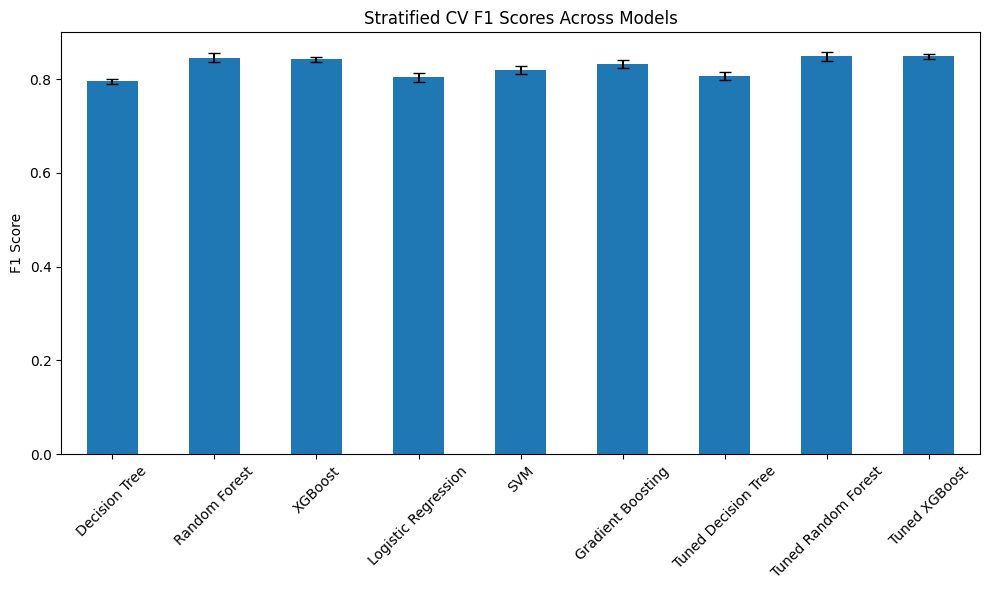

In [307]:
# Visualize CV results
plt.figure(figsize=(10, 6))
results_df = pd.DataFrame(cv_results).T
results_df['F1 Mean'].plot(kind='bar', yerr=results_df['Std (F1)'], capsize=4)
plt.title('Stratified CV F1 Scores Across Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [308]:
# Select final best model based on CV
best_cv_model_name = results_df['F1 Mean'].idxmax()
best_cv_model = models[best_cv_model_name]
print(f"\nFinal Best Model from Stratified CV: {best_cv_model_name}")


Final Best Model from Stratified CV: Tuned XGBoost


In [309]:
# Evaluate Best Model on Test Set
best_cv_model.fit(X_train_scaled, y_train)
y_pred_best = best_cv_model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Test Classification Report:\n", classification_report(y_test, y_pred_best))

Test Accuracy: 0.8386
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.83      0.85      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [310]:
# Additional Metrics
y_pred_proba = best_cv_model.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.4f}")

AUC-ROC: 0.9297
AUC-PR: 0.9366


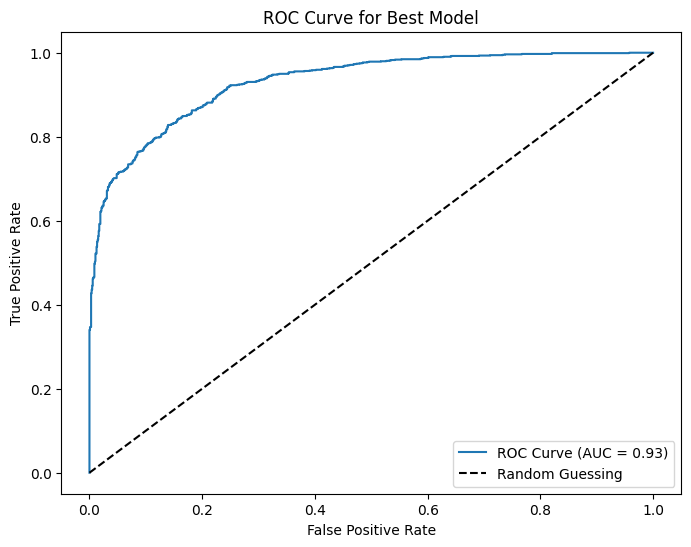

In [312]:
# Plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Model')
plt.legend()
plt.show()

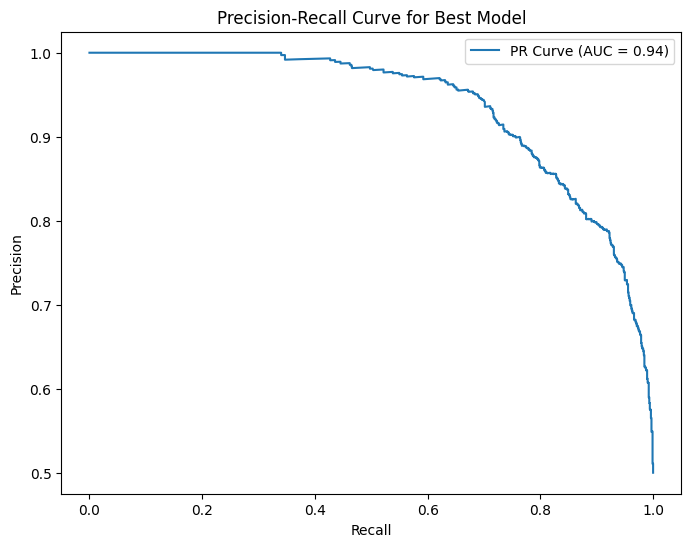

In [313]:
# Plot PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Best Model')
plt.legend()
plt.show()

In [314]:
# Save final model
with open('final_churn_model.pkl', 'wb') as file:
    pickle.dump(best_cv_model, file)
print("Final model saved as final_churn_model.pkl")

Final model saved as final_churn_model.pkl
